<a href="https://colab.research.google.com/github/haz05/TCC--Batuta_Eletronica/blob/main/Codigos/TCC_dados_v15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TCC- **BATUTA ELETRÔNICA PARA INCLUSÃO DE MÚSICOS COM DEFICIÊNCIA VISUAL EM ORQUESTRAS SINFÔNICAS**



Código 2

Código para a criação e Conversão da Rede Neural para C++


--------------------------------------------------------------------------------

Parte 1- Organização dos Dados em pares de Saídas e Entradas

In [ ]:
from google.colab import files
import io

uploaded  = files.upload()
arquivo = next(iter(uploaded)) #importação do arquivo tratado no algoritimo TCC__dados_coleta
#f
#f = io.BytesIO(uploaded['teste-2.csv'])

Saving df_dados.csv to df_dados.csv


In [ ]:
import pandas as pd

gfile_name = io.StringIO(uploaded[arquivo].decode('ISO 8859-1').strip())
df = pd.read_csv(gfile_name)
df

,Unnamed: 0,sinal (),aX (),aY (),aZ (),gX (),gY (),gZ ()
0,0,OFF,-71.0,-488.0,-507.0,-108.0,25.0,-32.0
1,1,OFF,-60.0,-482.0,-516.0,-113.0,26.0,-33.0
2,2,OFF,-49.0,-478.0,-522.0,-118.0,28.0,-34.0
3,3,OFF,-38.0,-473.0,-526.0,-125.0,30.0,-34.0
4,4,OFF,-29.0,-468.0,-526.0,-131.0,32.0,-34.0
...,...,...,...,...,...,...,...,...
23546,23546,OFF,61.0,-275.0,-554.0,-209.0,80.0,-88.0
23547,23547,OFF,81.0,-257.0,-574.0,-219.0,86.0,-92.0
23548,23548,OFF,100.0,-237.0,-589.0,-230.0,93.0,-95.0
23549,23549,OFF,117.0,-215.0,-598.0,-240.0,100.0,-98.0


In [ ]:
# imporatação de bibliotecas para tratar os dados
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(df.columns.ravel())

['Unnamed: 0' 'sinal ()' 'aX ()' 'aY ()' 'aZ ()' 'gX ()' 'gY ()' 'gZ ()']


In [ ]:
df = df.drop('Unnamed: 0', 1)   #remove coluna desnecessária 
#df = df.drop('UNIX Timestamp (Milliseconds since 1970-01-01)', 1)
#df = df.loc[:,'aX ()':'sinal ()']
df

,sinal (),aX (),aY (),aZ (),gX (),gY (),gZ ()
0,OFF,-71.0,-488.0,-507.0,-108.0,25.0,-32.0
1,OFF,-60.0,-482.0,-516.0,-113.0,26.0,-33.0
2,OFF,-49.0,-478.0,-522.0,-118.0,28.0,-34.0
3,OFF,-38.0,-473.0,-526.0,-125.0,30.0,-34.0
4,OFF,-29.0,-468.0,-526.0,-131.0,32.0,-34.0
...,...,...,...,...,...,...,...
23546,OFF,61.0,-275.0,-554.0,-209.0,80.0,-88.0
23547,OFF,81.0,-257.0,-574.0,-219.0,86.0,-92.0
23548,OFF,100.0,-237.0,-589.0,-230.0,93.0,-95.0
23549,OFF,117.0,-215.0,-598.0,-240.0,100.0,-98.0


In [ ]:
df.reset_index(drop=True, inplace=True) #resetar o index da tabela
df

,sinal (),aX (),aY (),aZ (),gX (),gY (),gZ ()
0,OFF,-71.0,-488.0,-507.0,-108.0,25.0,-32.0
1,OFF,-60.0,-482.0,-516.0,-113.0,26.0,-33.0
2,OFF,-49.0,-478.0,-522.0,-118.0,28.0,-34.0
3,OFF,-38.0,-473.0,-526.0,-125.0,30.0,-34.0
4,OFF,-29.0,-468.0,-526.0,-131.0,32.0,-34.0
...,...,...,...,...,...,...,...
23546,OFF,61.0,-275.0,-554.0,-209.0,80.0,-88.0
23547,OFF,81.0,-257.0,-574.0,-219.0,86.0,-92.0
23548,OFF,100.0,-237.0,-589.0,-230.0,93.0,-95.0
23549,OFF,117.0,-215.0,-598.0,-240.0,100.0,-98.0


In [ ]:
#celula responsável por converter os dados para float e remover o ganho colocado para a transmissão do acelerometro ao emissor de dados, na fase de coleta de dados

df_temp1 = df.copy()   

df_temp1['aY ()'] = df_temp1['aY ()'].astype(float)
df_temp1['aY ()'] = pd.to_numeric(df_temp1['aY ()'], downcast='float')


df_temp1.loc[df_temp1['sinal ()'] == 'OFF', 'sinal ()'] = 0
df_temp1.loc[df_temp1['sinal ()'] == 'ON', 'sinal ()'] = 200

df_temp1['sinal ()'] = df_temp1['sinal ()'].astype(float)
df_temp1['sinal ()'] = pd.to_numeric(df_temp1['sinal ()'], downcast='float')

df_temp1['mag ()'] = 0

df_temp1['aX ()'] = df_temp1['aX ()']/100.0
df_temp1['aY ()'] = df_temp1['aY ()']/100.0
df_temp1['aZ ()'] = df_temp1['aZ ()']/100.0

In [ ]:
#Laço responsável por criar o vetor magnitude 
for i in range(len(df_temp1)):

  
  a=  (df_temp1.iloc[i]['aX ()']**2) + (df_temp1.iloc[i]['aY ()']**2) + (df_temp1.iloc[i]['aZ ()']**2)

  #df_temp1.iloc[i]['mag ()'].values = 
  df_temp1['mag ()'].values[i] = a
  #print(df_temp1.iloc[i]['mag ()'])


In [ ]:
#df_temp1['aY ()'] = df_temp1['aY ()']*60

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

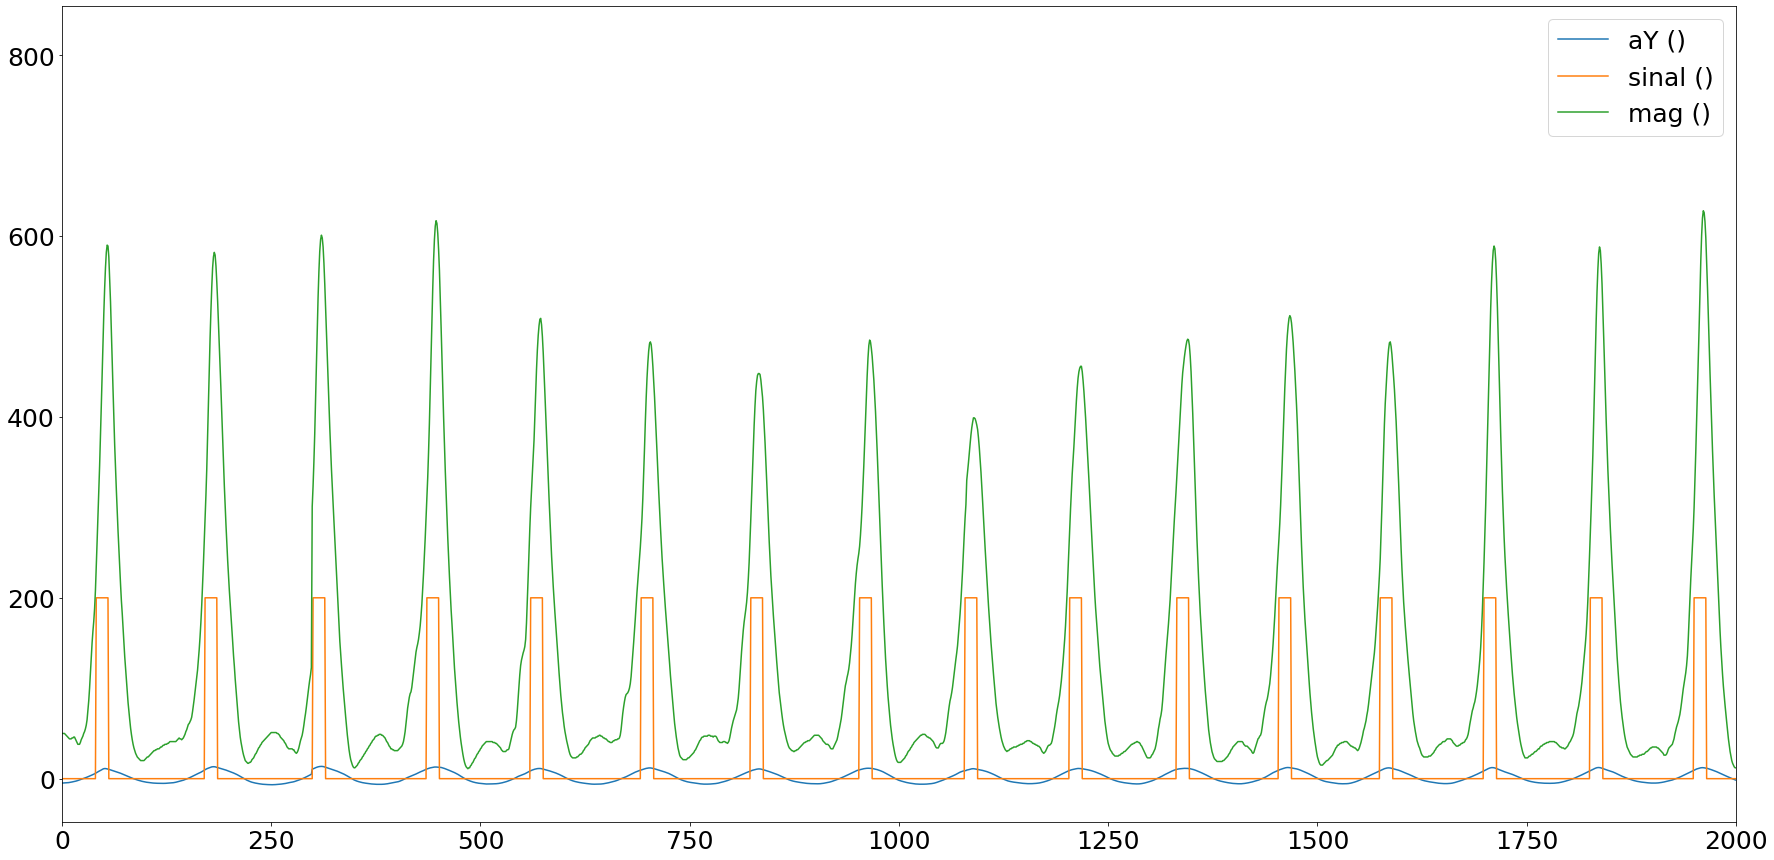

In [ ]:
#célula para visualização dos dados

plt.figure(figsize=(30,15))
df_temp1['aY ()'].plot()
df_temp1['sinal ()'].plot()
df_temp1['mag ()'].plot()
#df_temp1['aX ()'].plot()
#df_temp1['aZ ()'].plot()

plt.legend(fontsize=25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlim([0,2000])
from google.colab import files
plt.savefig("alterado_mag.svg")
files.download("alterado_mag.svg") 

In [1]:
#célula para remoção dos eixos para implementação da rede neural
df_temp1 = df_temp1.drop('aX ()', 1)
df_temp1 = df_temp1.drop('aY ()', 1)
df_temp1 = df_temp1.drop('aZ ()', 1)
df_temp1 = df_temp1.drop('gX ()', 1)
df_temp1 = df_temp1.drop('gY ()', 1)
df_temp1 = df_temp1.drop('gZ ()', 1)
#df_temp = df_temp.drop('predict', 1)
df_temp1


NameError: ignored

In [ ]:
#Célula para criação das matrizes de entradas e saídas correspondentes

#random_seed = 42   
n_time_steps = 5
n_features = 1 
step = 10 
#n_classes = 6 
n_epochs = 50       
n_batch_size = 100   
learning_rate = 0.0025
l2_loss = 0.0015

X_vet = []
Y_vet = []

import numpy as np

for i in range(0,  df_temp1.shape[0]- n_time_steps):  
  
  x_temp = df_temp1['mag ()'].values[i: i + n_time_steps]
  #y_temp = df_temp1['sinal ()'].values[i: i + n_time_steps]
  y_temp = df_temp1['sinal ()'].values[i: i + n_time_steps]/200

  X_vet.append(x_temp)
  Y_vet.append(y_temp)


X_vet = np.array(X_vet)
Y_vet = np.array(Y_vet)

#X = df_temp.loc[:,'aY ()']/800
#X = X.to_numpy()
#Y = df_temp.loc[:,'sinal ()']/1000
#Y = Y.to_numpy()

In [ ]:
 #Transforma a dimenssão da matriz do eixo X para (n , 5, 1)
 reshaped_segments = np.asarray(X_vet, dtype= np.float32).reshape(-1, n_time_steps, n_features)
 #reshaped_segments

In [ ]:
reshaped_segments.shape

(23546, 5, 1)

In [ ]:
#Criação de um vetor com o par da saída
Y_final = []
for vetor in Y_vet:
  a = 0
  for i in vetor:
    if i > 0:
      a = 1
  Y_final.append(a)


In [ ]:

Y_final =np.array(Y_final)
Y_final.shape

(23546,)

In [ ]:
from tensorflow.keras.utils import to_categorical # utiliza a biblioteca do keras para formar uma matriz de pares binários
Yf = to_categorical(Y_final)

In [ ]:
Yf.shape

(23546, 2)

In [ ]:
from sklearn.model_selection import train_test_split # separação dos dados de treinamento e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X_vet, Yf, test_size = 0.2)

In [ ]:
Y_test[2][1]

0.0

In [ ]:
# for i in range(len(X_test)):
#   if Y_test[i][1] == 1:
#     print(X_test[i])

In [ ]:
X_test

array([[ 33,  32,  32,  31,  30],
       [466, 466, 462, 454, 443],
       [ 49,  54,  59,  66,  73],
       ...,
       [ 26,  26,  27,  27,  28],
       [ 37,  48,  60,  73,  86],
       [ 90,  82,  74,  67,  60]])

In [ ]:
# X = df_temp.loc[:,'aY ()']/800
# X = X.to_numpy()
# Y = df_temp.loc[:,'sinal ()']/1000
# Y = Y.to_numpy()
# X=X.reshape((-1, 1))
# X

In [ ]:
# from operator import index
# import random
# import math

# # Aqui criamos uma lista de índices
# # embaralhados
# amostras = len(X)
# indexes = list(range(amostras))
# #random.shuffle(indexes)

# # Essa variável T indica quantas amostras
# # serão usadas para treinamento. As demais
# # serão usadas para validação
# T = math.floor(0.8*amostras)


# X_train = X[:T]
# Y_train = Y[:T]
# X_test = X[T:]
# Y_test = Y[T:]

In [ ]:
Y_train.shape

(18836, 2)

Parte 2- Criação da Rede Neural

In [ ]:
import numpy
import  tensorflow as tf 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.engine.input_layer import Input
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Reshape



In [ ]:
#df

In [ ]:
X_train.shape

(18836, 5)

Treinamento da Rede Neural 

In [ ]:
model = Sequential()
#model.add(Reshape((1,5), input_shape=(5,1)))

model.add(Dense(n_time_steps, activation='sigmoid',input_shape=(n_time_steps,)))
model.add(Dense(16, activation='sigmoid'))
#model.add(LSTM(units = 20, dropout=0.1, recurrent_dropout=0.1,input_shape=(5,1)))
#model.add(LSTM(10, dropout=0.1, recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid')) 
class_weight = {0: 1.,
                  1: 1.}
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics='AUC')
history = model.fit(X_train, Y_train,class_weight =class_weight,validation_data=(X_test, Y_test), epochs=80, batch_size=60)



Epoch 1/80
314/314 [==============================] - 2s 3ms/step - loss: 0.4615 - auc: 0.8399 - val_loss: 0.4407 - val_auc: 0.8541
Epoch 2/80
314/314 [==============================] - 1s 3ms/step - loss: 0.4453 - auc: 0.8499 - val_loss: 0.4325 - val_auc: 0.9071
Epoch 3/80
314/314 [==============================] - 1s 3ms/step - loss: 0.4320 - auc: 0.8692 - val_loss: 0.4248 - val_auc: 0.8880
Epoch 4/80
314/314 [==============================] - 1s 3ms/step - loss: 0.4182 - auc: 0.8862 - val_loss: 0.4006 - val_auc: 0.9271
Epoch 5/80
314/314 [==============================] - 1s 3ms/step - loss: 0.3863 - auc: 0.9099 - val_loss: 0.3658 - val_auc: 0.9246
Epoch 6/80
314/314 [==============================] - 1s 2ms/step - loss: 0.3483 - auc: 0.9261 - val_loss: 0.3231 - val_auc: 0.9407
Epoch 7/80
314/314 [==============================] - 1s 3ms/step - loss: 0.3107 - auc: 0.9377 - val_loss: 0.2906 - val_auc: 0.9509
Epoch 8/80
314/314 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 16)                96        
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
None


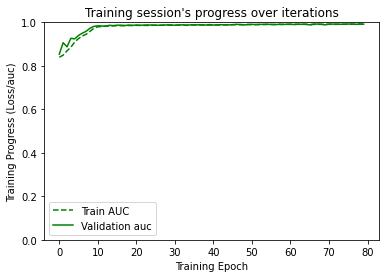

In [ ]:
#plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['auc']), "g--", label = "Train AUC")
#plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_auc']), "g-", label = "Validation auc")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/auc)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size = 60, verbose = 1)
print("Test Accuracy :", accuracy)
#print("Test Loss :", loss)

79/79 [==============================] - 0s 2ms/step - loss: 0.1131 - auc: 0.9921
Test Accuracy : 0.9921356439590454


In [ ]:
y = model.predict(X_vet)

In [ ]:
#Verificação da rede neural

#model = get_model()
#y = model.predict(X_vet)
for i in range(X_vet.shape[0]):
  #for j in range(Y_test.shape[1]):
  print(Yf[i],y[i])

In [ ]:
#Configura-se para valores acima de 0.45, uma predição correta

#y = model.predict(X_vet)
df_test = df_temp1.copy()
df_test['predict'] = 0.0
dados = np.zeros(len(df_test))
for i in range(len(df_test)-5):
  #print(i)
  if y[i,1] > 0.45:
    dados[i]= 100
  else:
    dados[i]= 0
df_test['predict']=pd.Series(dados)
  #print(dado)



In [ ]:
#para que se possa observar, ajustou-se um ganho para o numero de validação  
df_test.loc[df_test['sinal ()'] == 0, 'sinal ()'] = 0
df_test.loc[df_test['sinal ()'] == 1, 'sinal ()'] = 100
#df_test['aY ()'] = df_temp1['aY ()']*1.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

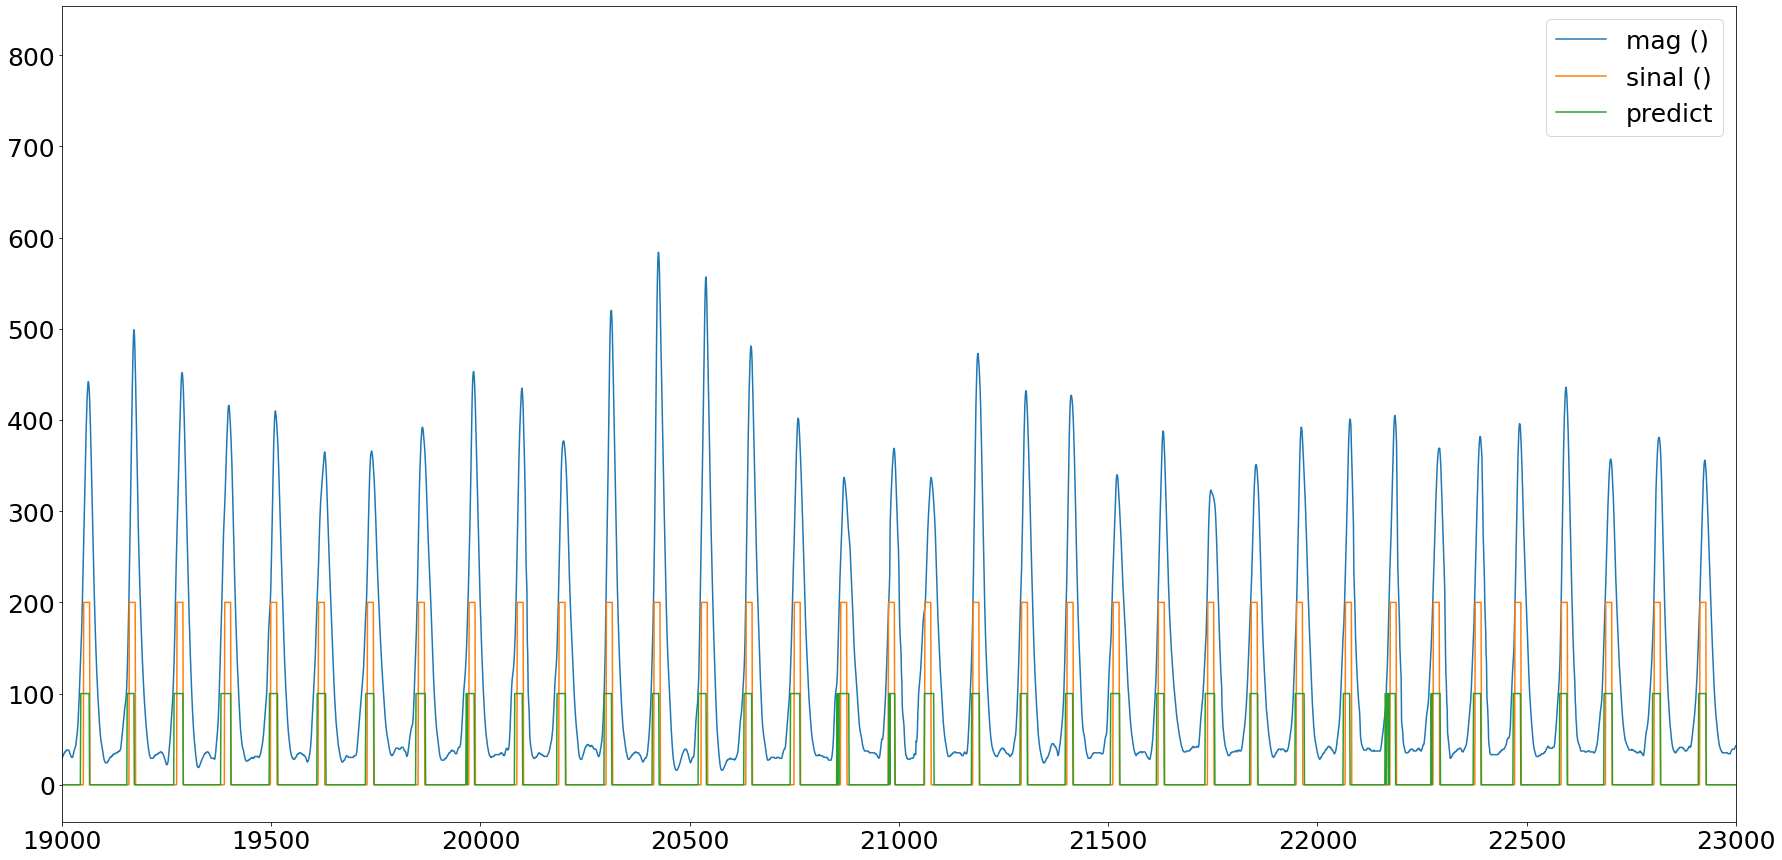

In [ ]:
#validação gráfica

plt.figure(figsize=(30,15))
df_test['mag ()'].plot()
df_test['sinal ()'].plot()
df_test['predict'].plot()
#df_test['aY ()'].plot()
plt.legend(fontsize=25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlim([19000,23000])
plt.savefig("saida-rede-neural.svg")
files.download("saida-rede-neural.svg") 

# A Rede Neural é convertida para C++ para que possa ser implemntada por Microcontroladores

In [ ]:
pip install tinymlgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tinymlgen: filename=tinymlgen-0.2-py3-none-any.whl size=2242 sha256=db44d7f9a1ecff093b3501b0fb7e908aed2268f9a19ceb6f8dc9906e1b176dd8
  Stored in directory: /root/.cache/pip/wheels/1c/94/c7/a18049eea10532c9975ad7353fcccc7c436673285b4723a4bb
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8913 sha256=bb3b2c5174ce8b2944362429eca460e8e59cb142171581be62da9c9982d5fba7
  Stored in directory: /root/.cache/pip/wheels/68/fe/aa/06fd9d6968cfc3e1926eeab1ec728c246dafa120a72ff9afae
Successfully built tinymlgen hexdump


In [ ]:
#Ocorreram erros de utilização para a biblioteca, para contornar a situação, copiou-se a mesma e foi inserido codigos para a converesão adequada

import re
import hexdump

def port(model, optimize=False, variable_name='acel_model', pretty_print=False):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
    converter._experimental_lower_tensor_list_ops = False
    if optimize:
        if isinstance(optimize, bool):
            optimizers = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
        else:
            optimizers = optimize
        converter.optimizations = optimizers
    tflite_model = converter.convert()
    bytes = hexdump.dump(tflite_model).split(' ')
    c_array = ', '.join(['0x%02x' % int(byte, 16) for byte in bytes])
    c = 'const unsigned char %s[] DATA_ALIGN_ATTRIBUTE = {%s};' % (variable_name, c_array)
    if pretty_print:
        c = c.replace('{', '{\n\t').replace('}', '\n}')
        c = re.sub(r'(0x..?, ){12}', lambda x: '%s\n\t' % x.group(0), c)
    c += '\nconst int %s_len = %d;' % (variable_name, len(bytes))
    preamble = '''
// if having troubles with min/max, uncomment the following
// #undef min    
// #undef max
#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif
'''
    return preamble + c

In [ ]:
#A celula a seguir gera o código necessário para se anexar ao código do Micro controlador

# #model = get_model()
# #from tinymlgen import port
c_code = port(model, pretty_print=True)
print(c_code)

INFO:tensorflow:Assets written to: /tmp/tmp23odfj26/assets



// if having troubles with min/max, uncomment the following
// #undef min    
// #undef max
#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif
const unsigned char acel_model[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 
	0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00, 0x38, 0x01, 0x00, 0x00, 
	0x20, 0x00, 0x00, 0x00, 0xe0, 0x00, 0x00, 0x00, 0x58, 0x00, 0x00, 0x00, 
	0x02, 0x00, 0x00, 0x00, 0xe4, 0x04, 0x00, 0x00, 0x2c, 0x04, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0x3c, 0x01, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 
	0x10, 0x0a, 0x00, 0x00, 0x0c, 0x0a, 0x00, 0x00, 